BINARY CLASSIFICATION

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv"
diabetics = pd.read_csv(url)
diabetics.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
diabetics.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


COMPARE FEATURES WITH EACH LABEL VALUE

In [3]:
#SEPERATE FEATURES AND LABELS

import matplotlib.pyplot as plt
%matplotlib inline

features =['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label ='Diabetic'
X, y= diabetics[features].values, diabetics[label].values

for n in range(0,4):
    print('Patient', str(n+1), "\n Features: ", list(X[n]), '\n Label: ', y[n])

Patient 1 
 Features:  [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label:  0
Patient 2 
 Features:  [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label:  0
Patient 3 
 Features:  [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label:  0
Patient 4 
 Features:  [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label:  1


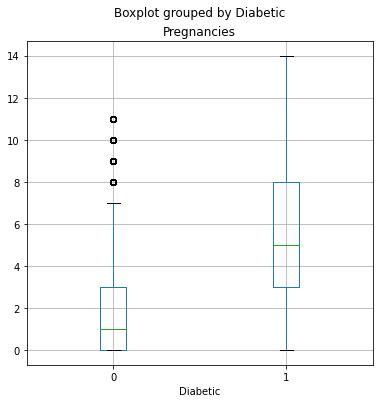

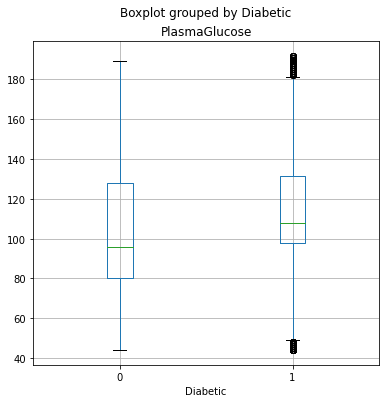

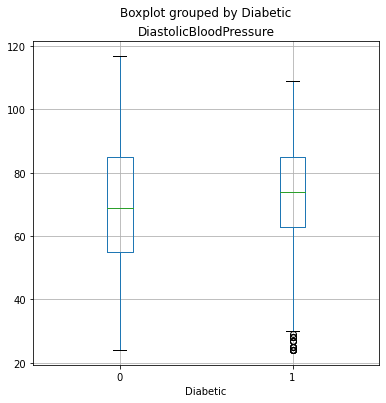

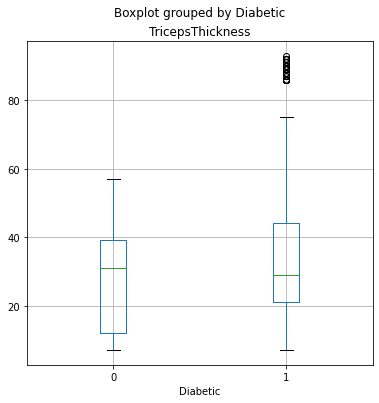

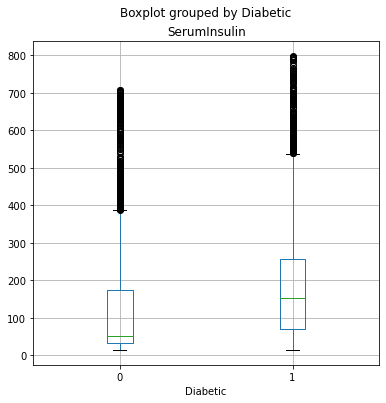

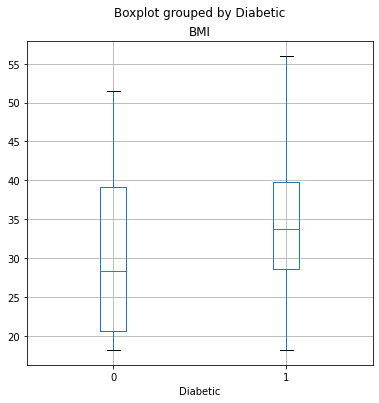

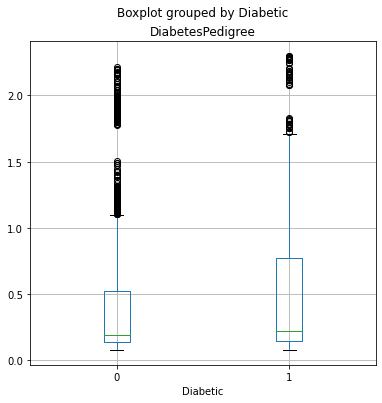

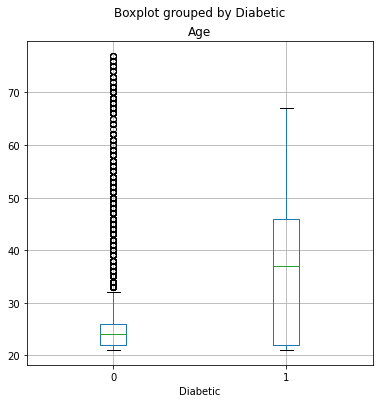

In [4]:
for col in features:
    diabetics.boxplot(column = col, by=label, figsize=(6,6))
    plt.title(col)

TRAIN AND EVALUATE BINARY CLASSIFICATION USING LOGISTIC REGRESSION

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


In [6]:
##TRAIN
from sklearn.linear_model import LogisticRegression

reg= 0.01
model = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [7]:
##EVALUATE
predictions = model.predict(X_test)
print('Predicted Labels: ', predictions)
print('Actual labels: ', y_test)

Predicted Labels:  [0 0 0 ... 0 1 0]
Actual labels:  [0 0 1 ... 1 1 1]


RESIDUALS

In [8]:
##METRIC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Classification Report:', classification_report(y_test, predictions))
print('Confusion matrix', confusion_matrix(y_test, predictions))

Accuracy:  0.7888888888888889
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500

Confusion matrix [[2636  350]
 [ 600  914]]


In [9]:
from sklearn.metrics import precision_score, recall_score

print('Overall Precision: ', precision_score(y_test, predictions))
print('Overall Recall: ', recall_score(y_test, predictions))

Overall Precision:  0.7231012658227848
Overall Recall:  0.6036988110964333


In [10]:
#Probability of binary classifier

y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81673295 0.18326705]
 [0.96317824 0.03682176]
 [0.80900511 0.19099489]
 ...
 [0.60687211 0.39312789]
 [0.10608559 0.89391441]
 [0.63833938 0.36166062]]


AUC:  0.8568307761185843


Text(0.5, 1.0, 'ROC Curve')

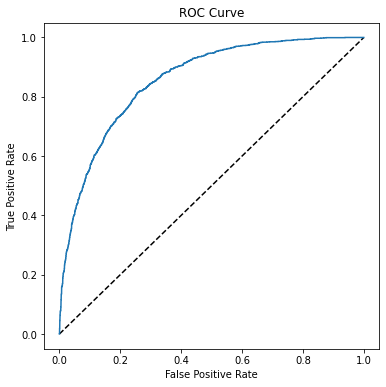

In [11]:
##The ROC shows the curve of the true and false positive rates between 0 and 1. 
##The AUC is a value between 0 and 1 that quantifies the overall performance of the model.
## The better model is one closer to 1

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#AUC
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: ', auc)

#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

PREPROCESSING TRANSFORMATION USING PIPELINES WITH LOGISTIC REGRESSION

In [12]:
#TRAIN

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix: [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202444963329531


Text(0.5, 1.0, 'ROC Curve')

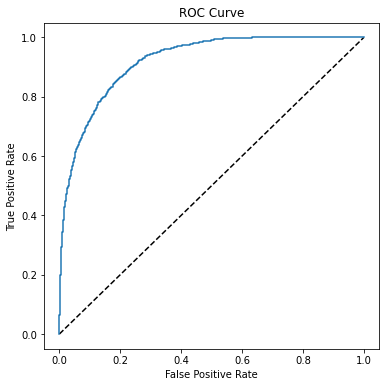

In [13]:
#EVALUATE THE MODEL AND RESIDUAL/METRICS
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)


#Get evaluation metrics
print('Confusion Matrix:', confusion_matrix(y_test, predictions), '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: '+str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')





In [14]:
#USING PREPROCESSING PIPELINE WITH RANDOMFORESTCLASSIFIER

In [15]:
#TRAIN

from sklearn.ensemble import RandomForestClassifier

#Create PREPROCESSING and TRAINING pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
('logregressor', RandomForestClassifier(n_estimators=100))])

model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2859  127]
 [ 180 1334]] 

Accuracy: 0.9317777777777778
Overall Precision: 0.9130732375085557
Overall Recall: 0.8811096433289299

AUC: 0.9823844386971875


Text(0.5, 1.0, 'ROC Curve')

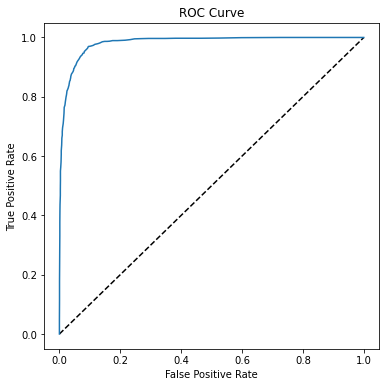

In [17]:
#EVALUATE MODEL AND RESIDUAL/METRIC

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

print ('Confusion Matrix:\n',confusion_matrix(y_test, predictions), '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


In [19]:
#SAVE AND USE MODEL

import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [20]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


MULTICLASS CLASSIFICATION

In [21]:
import pandas as pd

#load trainig dataset
url ='https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv'
penguins = pd.read_csv(url)

#Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
171,48.7,15.1,222.0,5350.0,1
104,37.9,18.6,193.0,2925.0,0
296,42.4,17.3,181.0,3600.0,2
174,46.5,14.5,213.0,4400.0,1
342,50.8,19.0,210.0,4100.0,2
6,38.9,17.8,181.0,3625.0,0
54,34.5,18.1,187.0,2900.0,0
127,41.5,18.3,195.0,4300.0,0
191,48.7,15.7,208.0,5350.0,1
288,47.0,17.3,185.0,3700.0,2


In [23]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

print(sample.columns[0:5].values, 'SpeciesName')

for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 46.4 15.0 216.0 4700.0 1 ] Gentoo
[ 45.2 16.6 191.0 3250.0 2 ] Chinstrap
[ 50.1 17.9 190.0 3400.0 2 ] Chinstrap
[ 39.6 18.8 190.0 4600.0 0 ] Adelie
[ 41.3 20.3 194.0 3550.0 0 ] Adelie
[ 36.0 17.8 195.0 3450.0 0 ] Adelie
[ 44.0 13.6 208.0 4350.0 1 ] Gentoo
[ 40.3 18.5 196.0 4350.0 0 ] Adelie
[ 45.0 15.4 220.0 5050.0 1 ] Gentoo
[ 49.6 18.2 193.0 3775.0 2 ] Chinstrap


In [24]:
#count the number of null values for each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [25]:
#which rows contain NaN values

penguins[ penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [26]:
#Drop Nan values

penguins = penguins.dropna()

#Confirm nan values
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

CORRELATION BETWEEN FEATURES AND LABELS

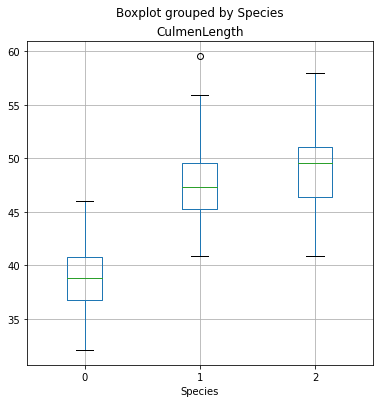

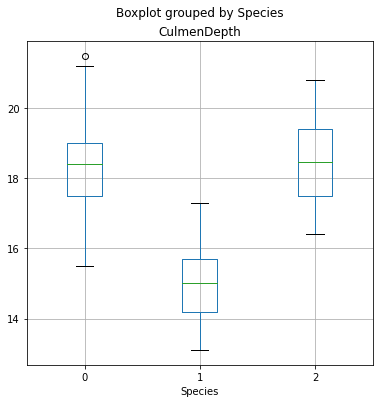

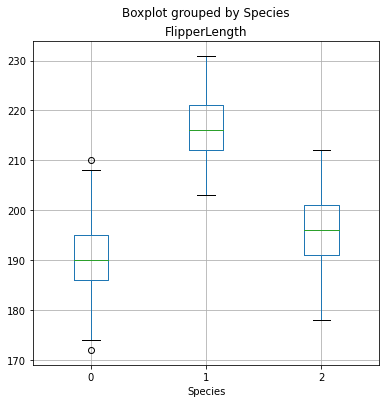

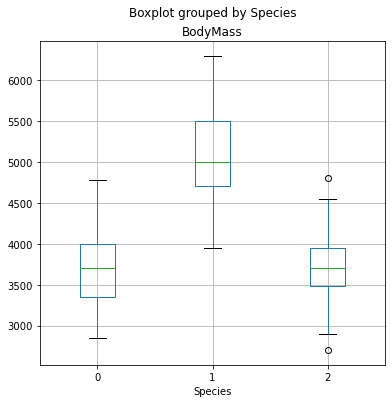

In [28]:
import matplotlib.pyplot as plt

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column = col, by = penguin_label, figsize=(6,6))
    plt.title(col)



TRAIN, EVALUATE and METRICS

In [29]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training Set: 239, Test Set: 103 



In [30]:
##TRAIN

from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [31]:
##EVALUATE

penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [37]:
##METRIC/ RESIDUAL

from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))


from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))


from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print('\n')
print( mcm)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]
